<a href="https://colab.research.google.com/github/profanup/DS_PY_2122/blob/main/Eperiment_09_ML_Treeclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment No : 09






#**Aim :** 
Case study of ML Classification Model with example from Data Mining Cup 2019.

#**Working**: 

**DATA MINING Cup 2019**

The DATA MINING CUP (DMC for short) has inspired students around the world to pursue intelligent data analysis since the year 2000. We are using here a task proposed in 2019 as part of Data Mining Cup an international competition.

In the following section firs twe will look at the Data Mining Cup 2019 Task and understand its background




## Understanding ML Problem 

### 1. Understanding Task

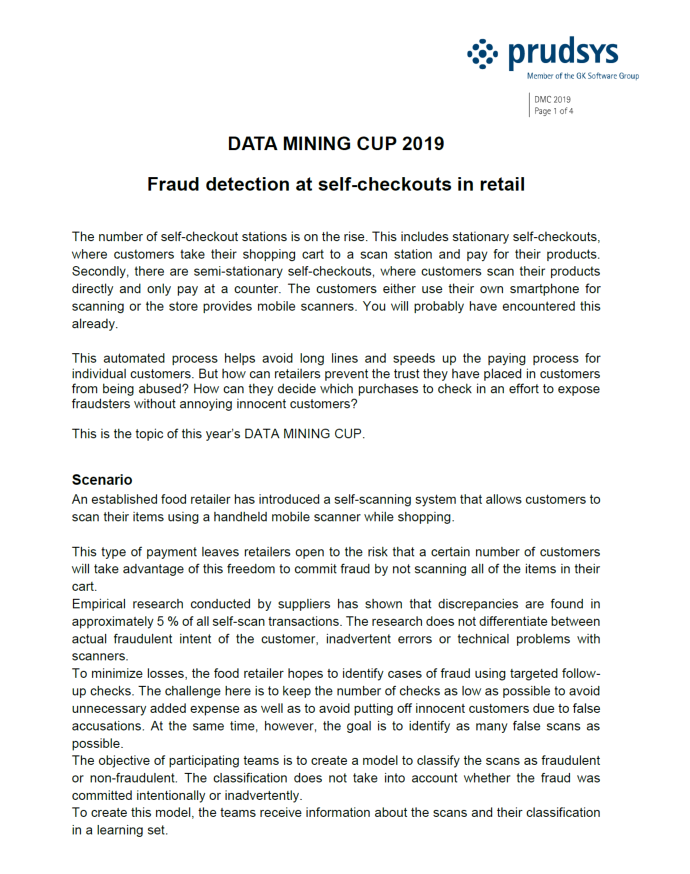

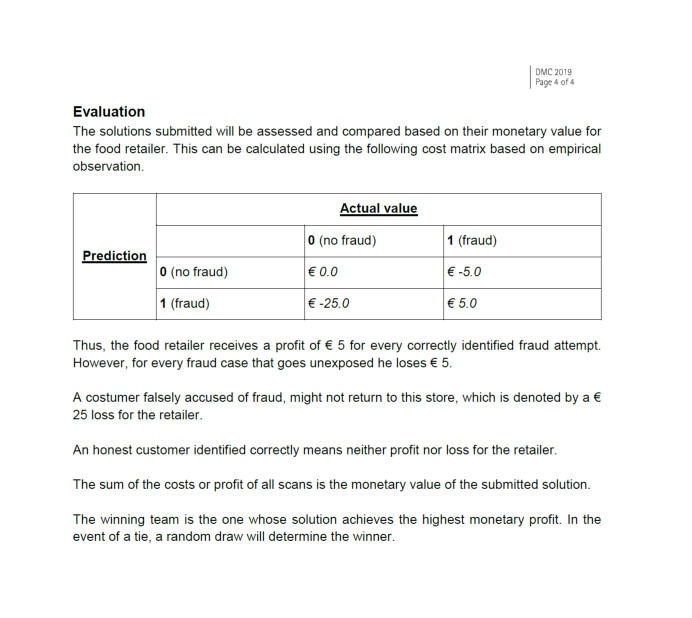

### 2. Data Understanding

---



#### Download the DMC 2019 dataset
Following link can be used to download the DMC 2019 task informaion from following web link:
https://www.data-mining-cup.com/reviews/dmc-2019/# 

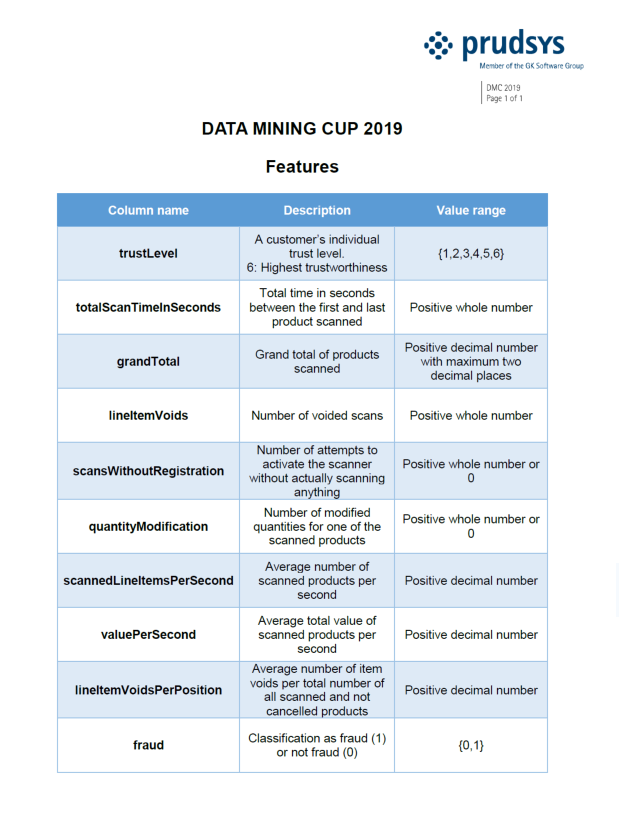

#### Data Loading

First thing we do is to get data into the colab environment using following code. 

since its a formal competition task the data is already in preprocessed form and we need to pay attention to data cleaning and wrangling.


In [1]:
# download the DMC 2019 dataset from https://www.data-mining-cup.com/reviews/dmc-2019/# 
# And upload train.csv to colab environment using file upload cotrol 
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition|fraud\n5|1054|54.7|7|0|3|0.0275142314990512|0.0518975332068311|0.241379310344828|0\n3|108|27.36|5|2|4|0.12962962962963|0.253333333333333|0.357142857142857|0\n3|1516|62.16|3|10|5|0.00857519788918206|0.0410026385224274|0.230769230769231|0\n6|1791|92.31|8|4|4|0.0161920714684534|0.0515410385259632|0.275862068965517|0\n5|430|81.53|3|7|2|0.0627906976744186|0.189604651162791|0.111111111111111|0\n1|770|11.09|11|5|2|0.0337662337662338|0.0144025974025974|0.423076923076923|1\n3|294|55.63|2|7|1|0.0374149659863946|0.18921768707483|0.181818181818182|0\n2|1545|22.8|0|8|4|0.00647249190938511|0.0147572815533981|0|0\n6|962|65.44|7|0|2|0.0280665280665281|0.068024948024948|0.259259259259259|0\n2|725|41.08|10|2|4|0.0372413793103448|0.0566620689655172|0.37037037037037|0\n5|1533|84.73|4|2|4|0.0104370515329419|0.055270711024

### 3. Perform Exploratory Data Analysis
---



In [4]:
import pandas as pd
# Use read_csv from pandas to read the file for proceesing
# Read the pima-indians-diabetes.csv dataset into a dataframe say df
df = pd.read_csv("train.csv", sep = '|' )
df.head(2)


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0


In [5]:
#display column names
print(df.columns)

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud'],
      dtype='object')


In [7]:
# print first two rows
df.head(2)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0


In [8]:
df.tail(2)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0
1878,4,1140,38.03,2,2,3,0.016667,0.033360,0.105263,0


In [9]:
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [11]:
# Check if there are any columns with empty/null dataset ?
print('Check if there are any columns with empty/null dataset ?')
print(df.isnull().sum())

Check if there are any columns with empty/null dataset ?
trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64


In [13]:
print('correlation between all predictive features w.r.t "fraud" (target) feature')
cor = df.corr()['fraud']
print(cor)

correlation between all predictive features w.r.t "fraud" (target) feature
trustLevel                  -0.319765
totalScanTimeInSeconds       0.110414
grandTotal                   0.001421
lineItemVoids                0.063496
scansWithoutRegistration     0.074123
quantityModifications       -0.000864
scannedLineItemsPerSecond   -0.023085
valuePerSecond              -0.028873
lineItemVoidsPerPosition    -0.090116
fraud                        1.000000
Name: fraud, dtype: float64


Note What conclusion you draw from aobve code cell output.

**Type your answer here**

heatmap of the correlation matrix 


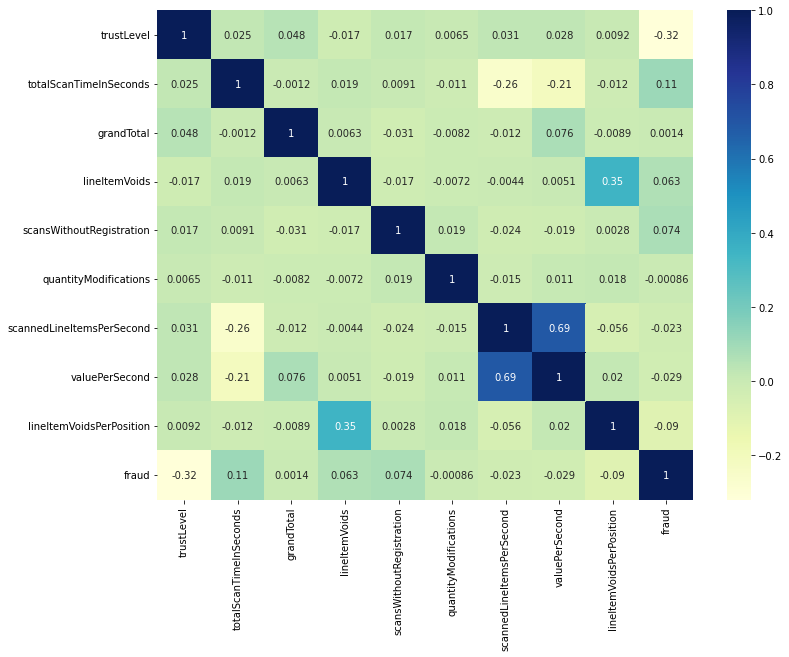

In [14]:
# Plot a heatmap of the correlation matrix obtained above.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
print('heatmap of the correlation matrix ')
import seaborn as sb 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) #rainbow



Does the visualisation make more sense ? (Yes /NO)

**Type your answer here**

Is the heat map symmetrical ? (Yes /No)

**Type your answer here**

Explain relation ship between features **scanLineItemsPerSec** and **valuePerSec**


### 4. Selecting and Applying ML based Solution 


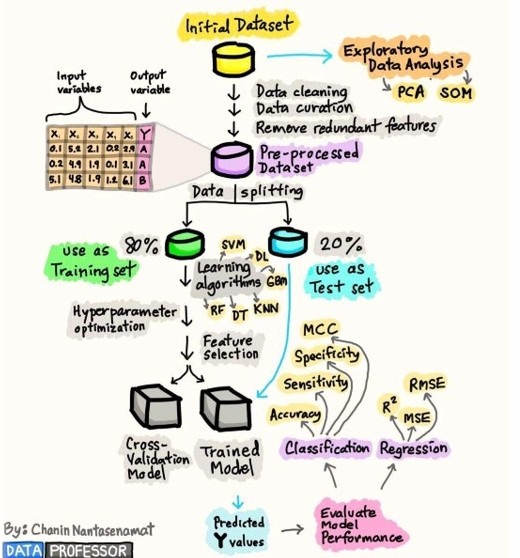

**Explain above model flow in your own words** 

To understand algorithms in detail visit web link :https://www.saedsayad.com/decision_tree.htm 

Summarize Tree Based Classification in your own words.




### Implemention of DT Based Classifier
---

In [ ]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.shape

(1879, 10)

In [ ]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.
# To divide the data into attributes and labels, do :
X = df.drop('fraud', axis=1)  

In [ ]:
X.shape

(1879, 9)

In [ ]:
y = df['fraud']

In [ ]:
# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=6) #,random_state=7

In [ ]:
X_train.head(1)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
1324,3,1444,17.76,5,7,5,0.018006,0.012299,0.192308


In [ ]:
X_train.shape

(1503, 9)

In [ ]:
X_test.shape

(376, 9)

In [ ]:
y_train.shape

(1503,)

In [ ]:
y_test.head()

486     0
1672    0
1071    0
992     0
1838    1
Name: fraud, dtype: int64

In [ ]:
dt = DecisionTreeClassifier()
dtree = dt.fit(X_train, y_train)

In [ ]:
predictions = dt.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9680851063829787
[[347   5]
 [  7  17]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       352
           1       0.77      0.71      0.74        24

    accuracy                           0.97       376
   macro avg       0.88      0.85      0.86       376
weighted avg       0.97      0.97      0.97       376



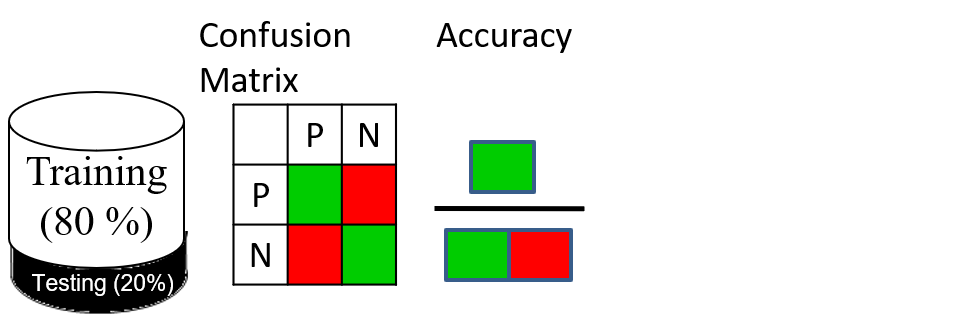

In [ ]:
col = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

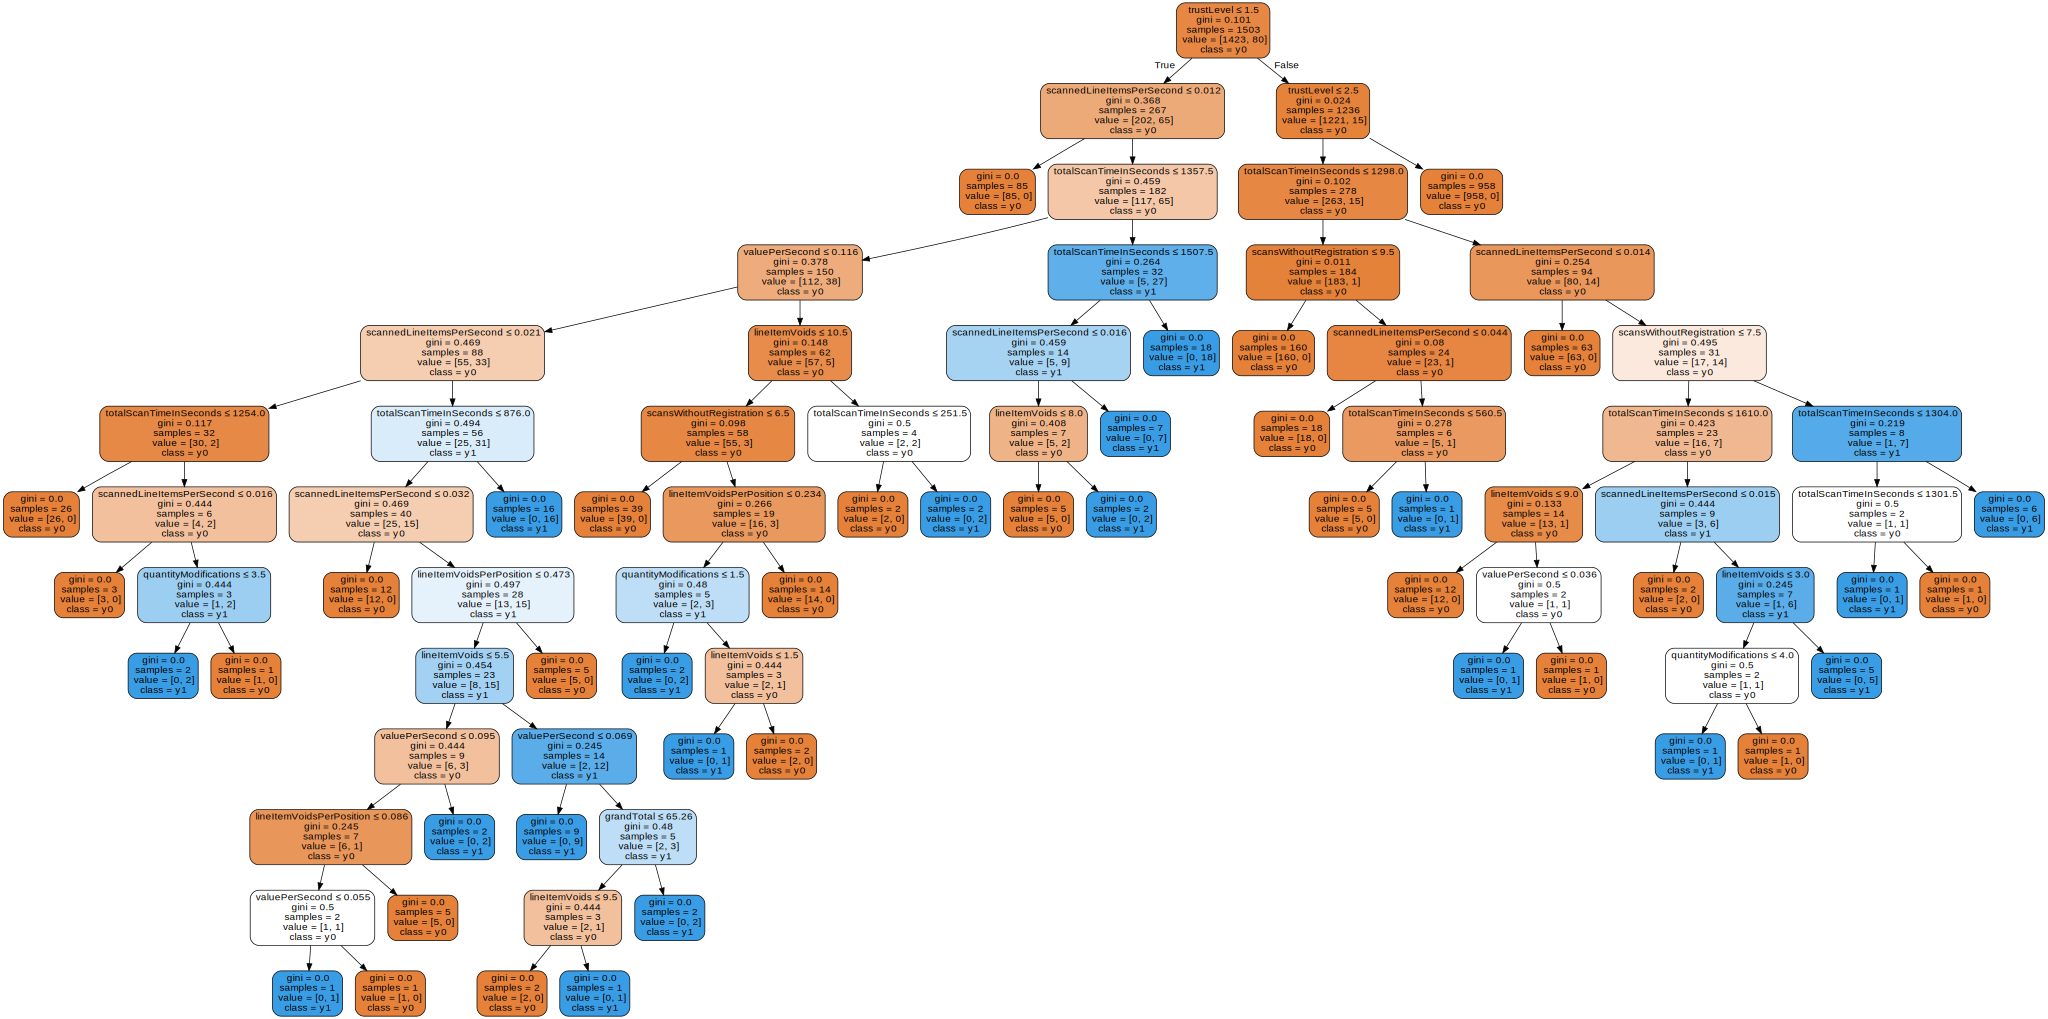

In [ ]:
import graphviz 
from sklearn.tree import export_graphviz

feature_names = col

dot_data = export_graphviz(dtree, out_file=None, feature_names=col, class_names=True, filled=True, rounded=True,   special_characters=True)  
graph = graphviz.Source(dot_data)

graph

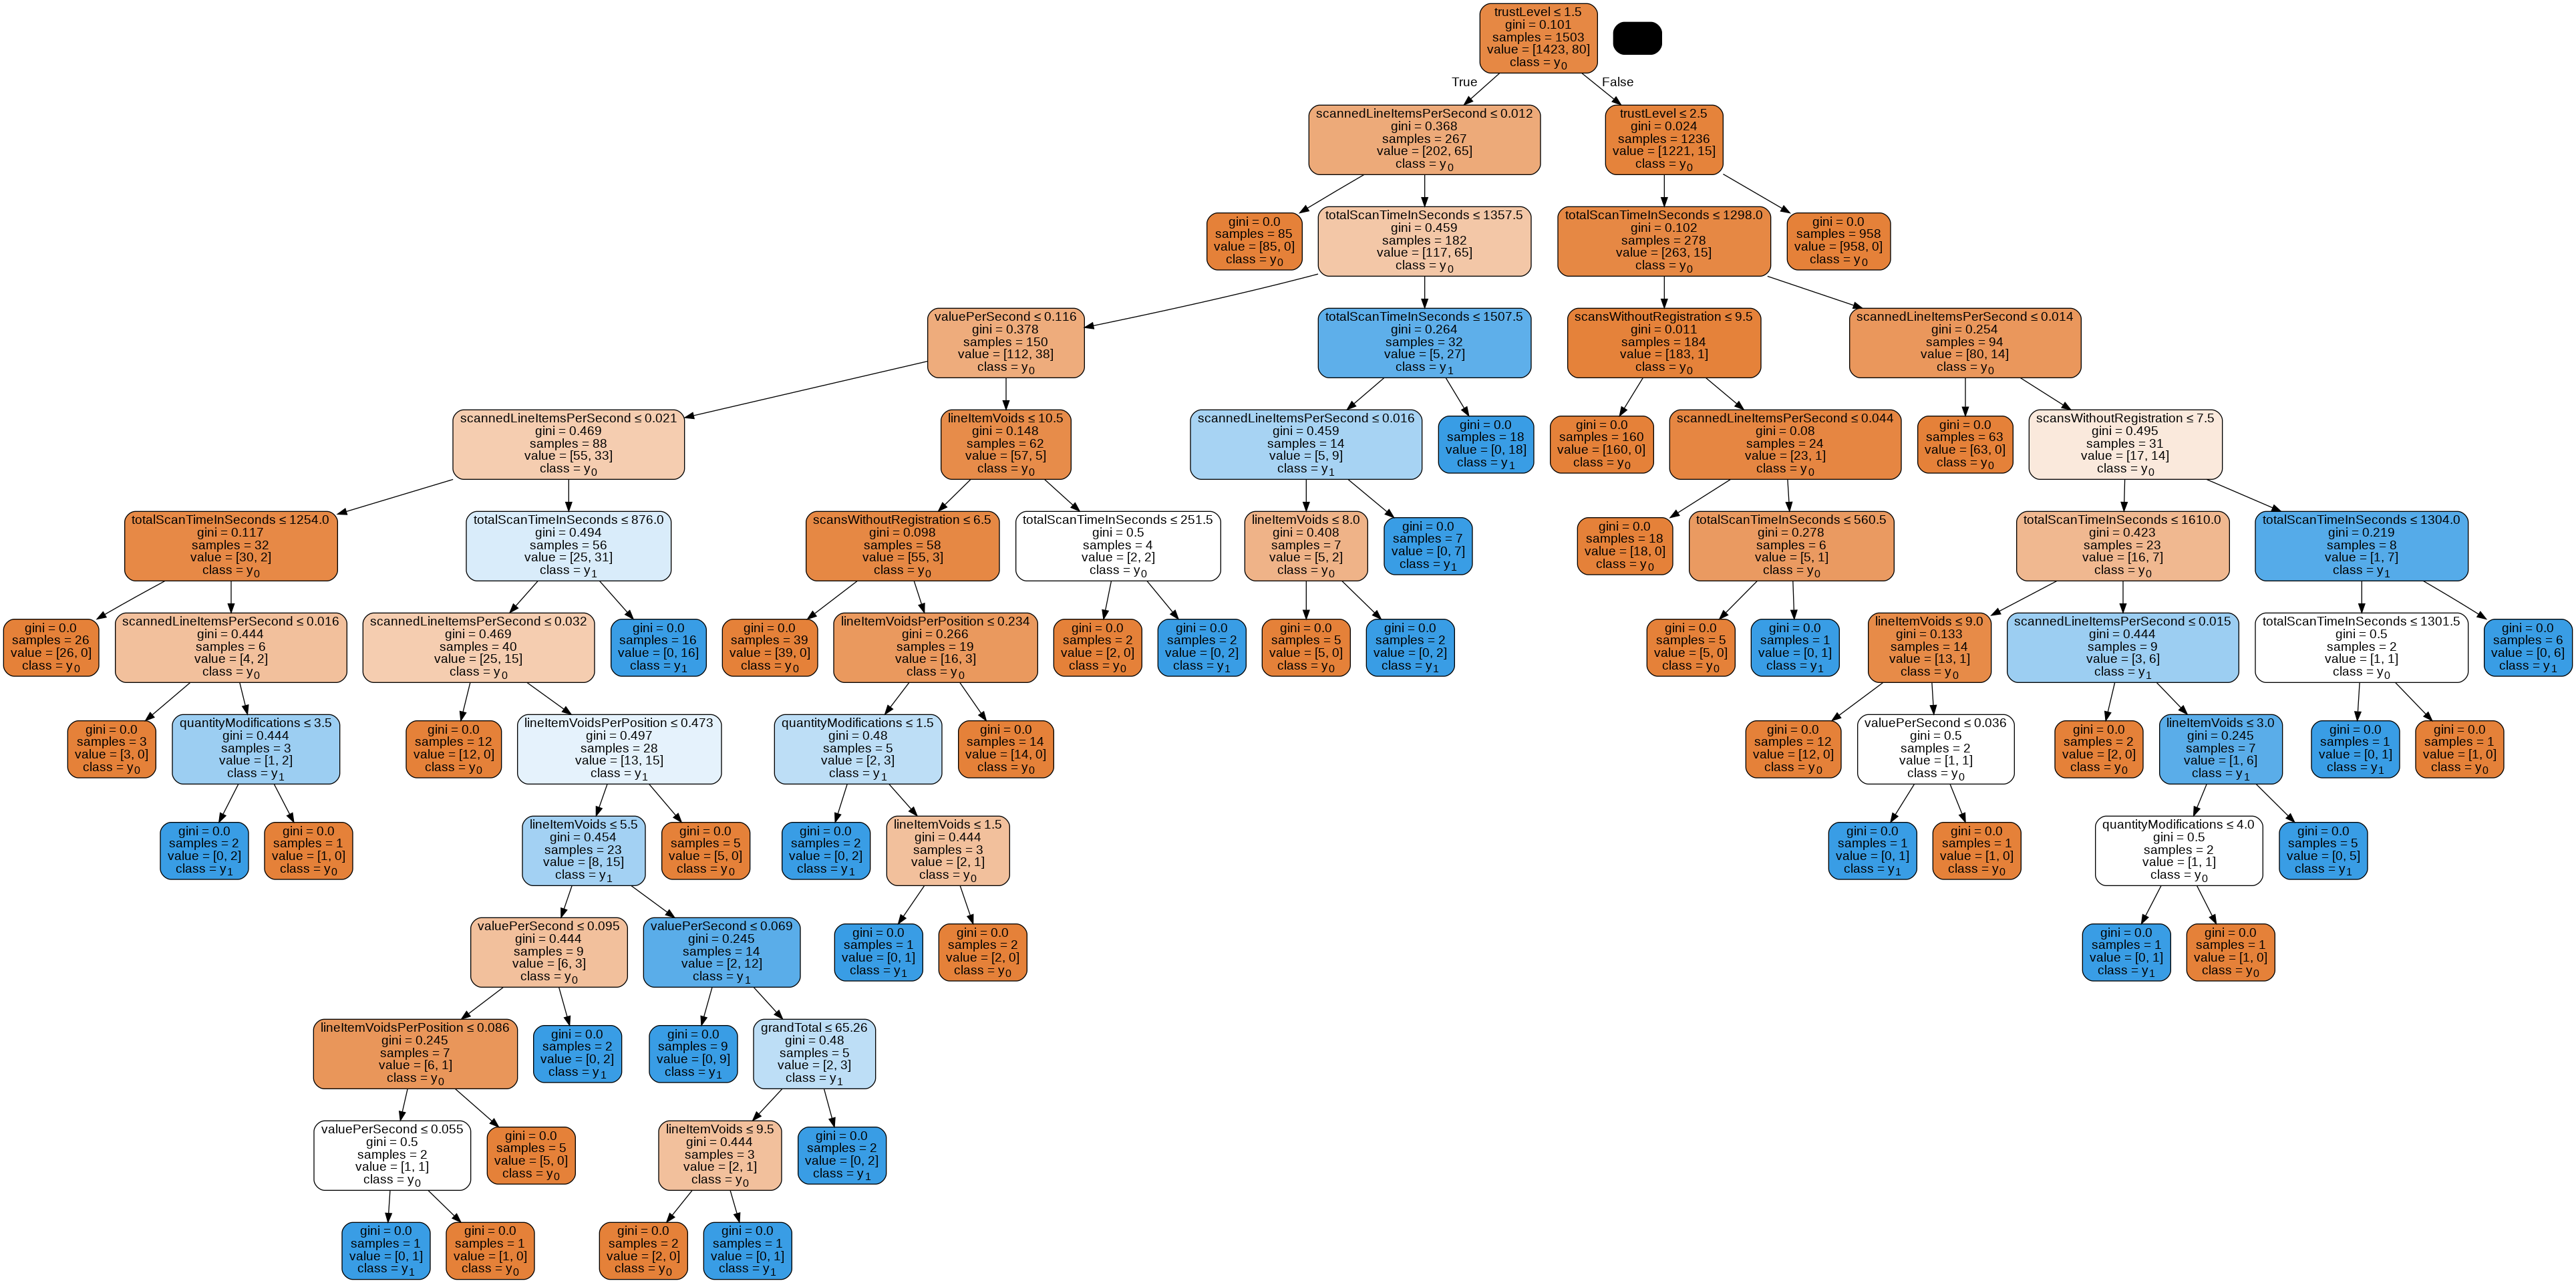

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = col,class_names=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('frauddetect.png')
Image(graph.create_png())

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 62 kB 690 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=f5106064c53e45495e4ad252b8f79457be4a825d8983a4b65ecf864675816344
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


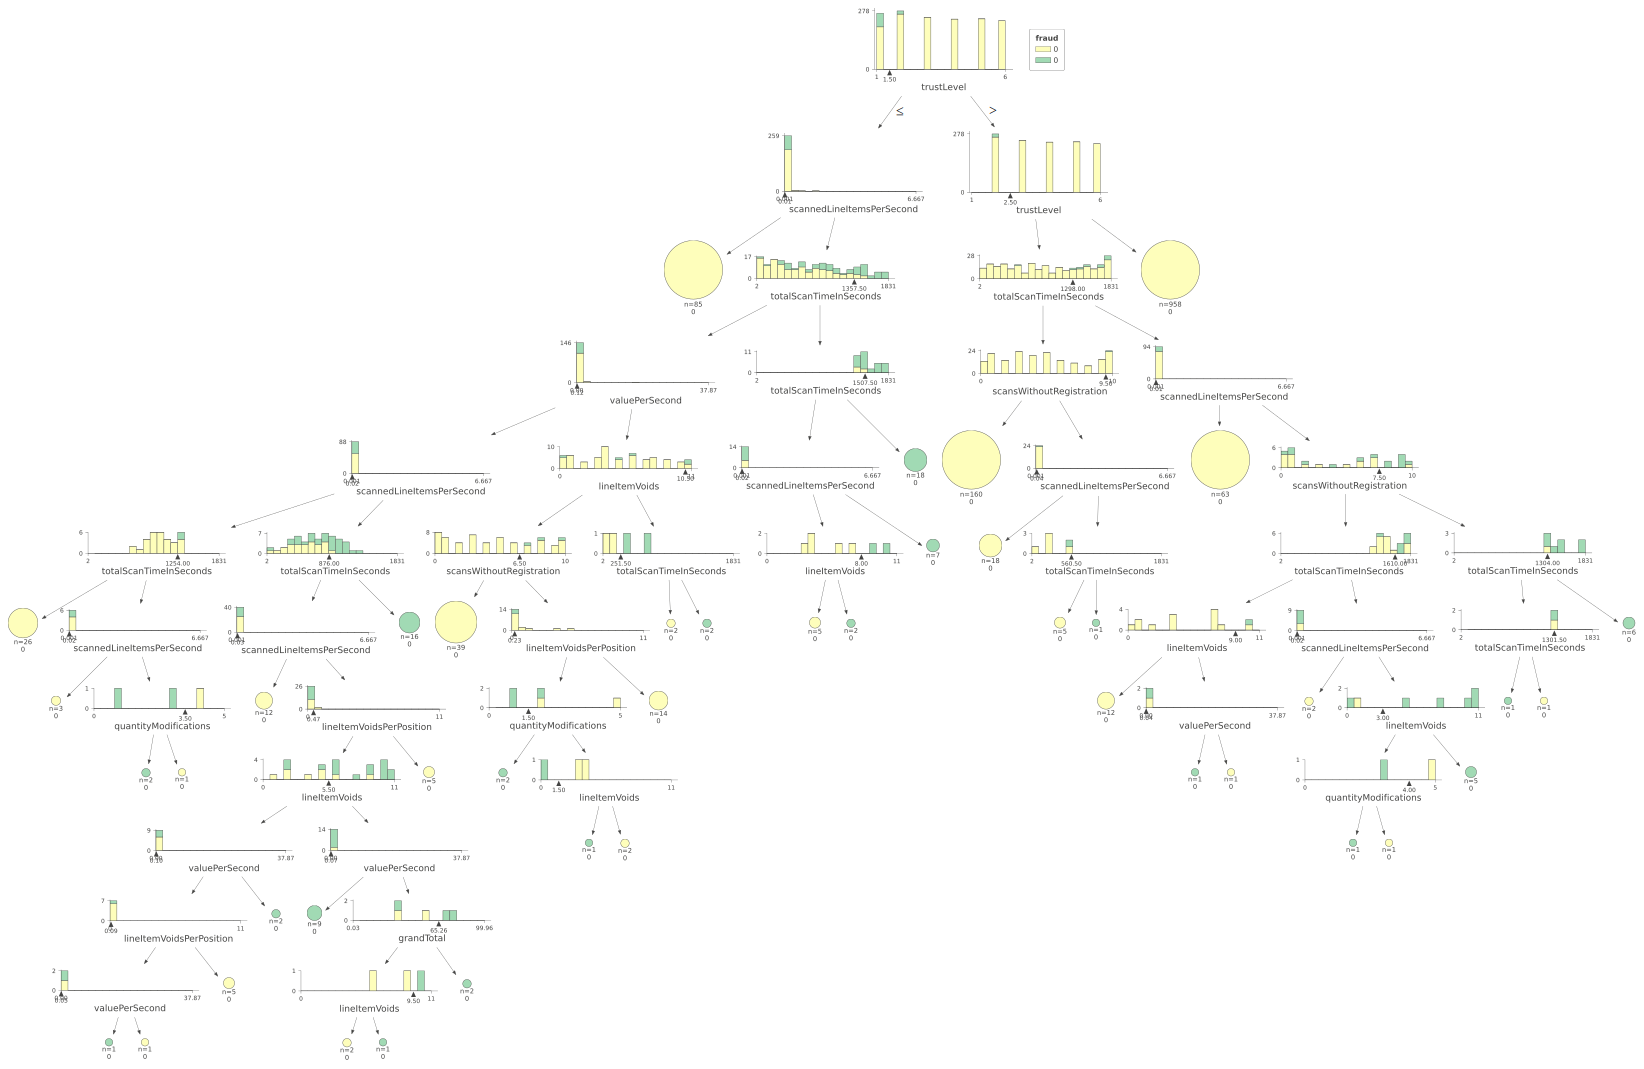

In [ ]:
col = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dtree, X_train, y_train, target_name="fraud", feature_names=col, class_names=list(df.fraud))

viz


In [ ]:
# Make predictions on validation dataset
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9867021276595744
[[359   3]
 [  2  12]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       362
           1       0.80      0.86      0.83        14

    accuracy                           0.99       376
   macro avg       0.90      0.92      0.91       376
weighted avg       0.99      0.99      0.99       376



### 6. Find the best parameters for the ADBoost classifier 
---

In [ ]:
for i in range(100, 600, 100):
  print(i)

100
200
300
400
500


In [ ]:
# Make predictions on validation dataset
for i in range(100, 600, 100):
  ada = AdaBoostClassifier(n_estimators=i)
  ada.fit(X_train, y_train)
  predictions = ada.predict(X_test)
  print(i,accuracy_score(y_test, predictions))

100 0.9867021276595744
200 0.9867021276595744
300 0.9840425531914894
400 0.9867021276595744
500 0.9893617021276596


### 7. How to Predict fraud for single record

In [ ]:
dummy = pd.DataFrame([[1,1233,23.84,9,6,0,0.0261096605744125,0.0311227154046997,0.45]], columns = col )  
dummy

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,1,1233,23.84,9,6,0,0.02611,0.031123,0.45


In [ ]:
dummypred = ada.predict(dummy)
dummypred

array([1])

### 8. Predict fraud for test.csv

In [ ]:
# you already downloaded test.csv
# but its too large to get uploaded quickly
# so create smalltest.csv ie first 500 rows of test.csv and predict fraud for them

# And upload it to colab
from google.colab import files
files.upload()

Saving test.csv to test.csv


In [ ]:
testset = pd.read_csv("smalltest.csv", sep="|", header=0)
predictions = ada.predict(testset)

In [ ]:
dfo = pd.DataFrame(predictions)
dfo.to_csv('your_predictions.csv',index=False,header = None)


# Conclusion
Thus we have learned about basics of  Contour plots, Histograms, Box plots. 